In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
import seaborn as sns
df1=pd.read_csv("D://mamta//HR_train.csv")
df2=pd.read_csv("D://mamta//HR_test.csv")
df=pd.concat([df1,df2],keys=("train","test"))

In [32]:
df.isnull().sum()

enrollee_id                   0
city                          0
city_development_index        0
gender                     7486
relevent_experience           0
enrolled_university         621
education_level             852
major_discipline           5231
experience                  103
company_size               8830
company_type               9369
last_new_job                671
training_hours                0
target                    15021
dtype: int64

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 33380 entries, ('train', 0) to ('test', 15020)
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             33380 non-null  int64  
 1   city                    33380 non-null  object 
 2   city_development_index  33380 non-null  float64
 3   gender                  25894 non-null  object 
 4   relevent_experience     33380 non-null  object 
 5   enrolled_university     32759 non-null  object 
 6   education_level         32528 non-null  object 
 7   major_discipline        28149 non-null  object 
 8   experience              33277 non-null  object 
 9   company_size            24550 non-null  object 
 10  company_type            24011 non-null  object 
 11  last_new_job            32709 non-null  object 
 12  training_hours          33380 non-null  int64  
 13  target                  18359 non-null  float64
dtypes: float64(2), in

In [34]:
df["experience"]=df["experience"].replace(to_replace=">20",value=21)
df["experience"]=df["experience"].replace(to_replace="<1",value=0)
df["company_size"]=df["company_size"].replace(to_replace="50-99",value=99)
df["company_size"]=df["company_size"].replace(to_replace="100-500",value=500)
df["company_size"]=df["company_size"].replace(to_replace="10000+",value=10001)
df["company_size"]=df["company_size"].replace(to_replace="10/49",value=49)
df["company_size"]=df["company_size"].replace(to_replace="<10",value=9)
df["company_size"]=df["company_size"].replace(to_replace="500-999",value=999)
df["company_size"]=df["company_size"].replace(to_replace="5000-9999",value=9999)
df["company_size"]=df["company_size"].replace(to_replace="1000-4999",value=4999)
df["last_new_job"]=df["last_new_job"].replace(to_replace=">4",value=5)
df["last_new_job"]=df["last_new_job"].replace(to_replace="never",value=0)
df["education_level"]=df["education_level"].replace(to_replace="Primary School",value=0)
df["education_level"]=df["education_level"].replace(to_replace="High School",value=1)
df["education_level"]=df["education_level"].replace(to_replace="Graduate",value=2)
df["education_level"]=df["education_level"].replace(to_replace="Phd",value=4)
df["education_level"]=df["education_level"].replace(to_replace="Masters",value=3)
df["gender"]=df["gender"].replace(to_replace="Male",value=2)
df["gender"]=df["gender"].replace(to_replace="Female",value=1)
df["gender"]=df["gender"].replace(to_replace="Other",value=0)
df["gender"]=pd.to_numeric(df["gender"],errors='ignore')
df["education_level"]=pd.to_numeric(df["education_level"],errors='ignore')
df["experience"]=pd.to_numeric(df["experience"],errors='ignore')
df["last_new_job"]=pd.to_numeric(df["last_new_job"],errors='ignore')
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
df["relevent_experience"]=le.fit_transform(df["relevent_experience"])
df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 33380 entries, ('train', 0) to ('test', 15020)
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             33380 non-null  int64  
 1   city                    33380 non-null  object 
 2   city_development_index  33380 non-null  float64
 3   gender                  25894 non-null  float64
 4   relevent_experience     33380 non-null  int32  
 5   enrolled_university     32759 non-null  object 
 6   education_level         32528 non-null  float64
 7   major_discipline        28149 non-null  object 
 8   experience              33277 non-null  float64
 9   company_size            24550 non-null  float64
 10  company_type            24011 non-null  object 
 11  last_new_job            32709 non-null  float64
 12  training_hours          33380 non-null  int64  
 13  target                  18359 non-null  float64
dtypes: float64(7), in

In [35]:
df.isnull().sum()

enrollee_id                   0
city                          0
city_development_index        0
gender                     7486
relevent_experience           0
enrolled_university         621
education_level             852
major_discipline           5231
experience                  103
company_size               8830
company_type               9369
last_new_job                671
training_hours                0
target                    15021
dtype: int64

In [36]:
df["gender"].fillna("Male",inplace=True)
df["enrolled_university"].fillna("unknown",inplace=True)
df["enrolled_university"].fillna("unknown",inplace=True)
df["major_discipline"].fillna("unknown",inplace=True)
df["education_level"].fillna("unknown",inplace=True)
df["experience"].fillna(df["experience"].mode()[0],inplace=True)
df["company_size"].fillna("unknown",inplace=True)
df["last_new_job"].fillna("unknown",inplace=True)
df["company_type"].fillna("unknown",inplace=True)

In [37]:
df[df["target"]==0]["last_new_job"].value_counts()

1.0        6549
5.0        2978
2.0        2446
0.0        1876
3.0         897
4.0         891
unknown     297
Name: last_new_job, dtype: int64

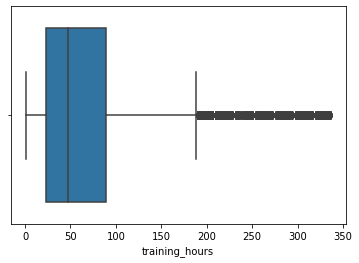

In [38]:
import seaborn as sns
sns.boxplot(x=df['training_hours'])

In [39]:
df[df["training_hours"]>200].count()

enrollee_id               1431
city                      1431
city_development_index    1431
gender                    1431
relevent_experience       1431
enrolled_university       1431
education_level           1431
major_discipline          1431
experience                1431
company_size              1431
company_type              1431
last_new_job              1431
training_hours            1431
target                     808
dtype: int64

In [40]:
#sns.pairplot(df)

In [41]:
#sns.pairplot(df)
#sns.countplot(df["Parch"],hue=df["Survived"])
#sns.countplot(df["Pclass"].value_counts())

In [42]:
#sns.countplot(df["Pclass"],hue=df["Survived"])

In [43]:
#sns.countplot(df["Embarked"],hue=df["Survived"])

In [44]:
#sns.boxplot(x=df["Pclass"],y=df["Survived"])
df.corr()

,enrollee_id,city_development_index,relevent_experience,experience,training_hours,target
enrollee_id,1.000000,-0.033087,0.034115,-0.029615,0.002380,0.033873
city_development_index,-0.033087,1.000000,-0.062545,0.296625,0.003372,-0.135700
relevent_experience,0.034115,-0.062545,1.000000,-0.341182,-0.005862,0.074088
experience,-0.029615,0.296625,-0.341182,1.000000,-0.001230,-0.086586
training_hours,0.002380,0.003372,-0.005862,-0.001230,1.000000,-0.004735
target,0.033873,-0.135700,0.074088,-0.086586,-0.004735,1.000000


In [45]:
df.isnull().sum()
df=df.drop(["enrollee_id"],axis=1)

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 33380 entries, ('train', 0) to ('test', 15020)
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    33380 non-null  object 
 1   city_development_index  33380 non-null  float64
 2   gender                  33380 non-null  object 
 3   relevent_experience     33380 non-null  int32  
 4   enrolled_university     33380 non-null  object 
 5   education_level         33380 non-null  object 
 6   major_discipline        33380 non-null  object 
 7   experience              33380 non-null  float64
 8   company_size            33380 non-null  object 
 9   company_type            33380 non-null  object 
 10  last_new_job            33380 non-null  object 
 11  training_hours          33380 non-null  int64  
 12  target                  18359 non-null  float64
dtypes: float64(3), int32(1), int64(1), object(8)
memory usage: 3.4+ MB


In [48]:
df_dummies=pd.get_dummies(df[df.select_dtypes(include=['object']).columns.tolist()])
df_num=df[df.select_dtypes(include=[np.number]).columns.tolist()]
#df_num_norm=(finaldf_num-finaldf_num.mean())/finaldf_num.std()
df=pd.concat([df_num,df_dummies],axis=1)
df=df.drop(["last_new_job_2.0"],axis=1)

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [50]:
x=df.drop(["target"],axis=1)
x1=x.iloc[0:18359]
y=df["target"]
y1=y.iloc[0:18359]
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.3,random_state=0)

In [51]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(class_weight="balanced")
lr.fit(x_train,y_train)
y_train_pred=lr.predict(x_train)
print("Accuracy",metrics.accuracy_score(y_train,y_train_pred))
y_pred=lr.predict(x_test)
print("Accuracy",metrics.accuracy_score(y_test,y_pred))

Accuracy 0.6780795268850673
Accuracy 0.6782861292665214


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [52]:
from sklearn import tree
dt=tree.DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_train_pred1=dt.predict(x_train)
print("Accuracy",metrics.accuracy_score(y_train,y_train_pred1))
y_pred1=dt.predict(x_test)
print("Accuracy",metrics.accuracy_score(y_test,y_pred1))

Accuracy 0.999299665395689
Accuracy 0.7748729121278141


In [53]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=400,criterion='gini')
rf.fit(x_train,y_train)
y_train_pred2=rf.predict(x_train)
print("Accuracy",metrics.accuracy_score(y_train,y_train_pred2))
y_pred2=rf.predict(x_test)
print("Accuracy",metrics.accuracy_score(y_test,y_pred2))


Accuracy 0.999299665395689
Accuracy 0.8582062454611474


In [ ]:
from sklearn.svm import SVC
classifier=SVC(kernel="linear")
classifier.fit(x_train,y_train)
y_train_pred3=classifrier.praedict(x_train)
print("Accuracy",metrics.accuracy_score(y_train,y_train_pred3))
y_pred3=classifier.predict(x_test)
print("Accuracy",metrics.accuracy_score(y_test,y_pred3))

In [22]:
!pip install lightgbm

In [54]:
import lightgbm as lgb
model = lgb.LGBMClassifier()
model.fit(x_train,y_train)
y_train_pred3=model.predict(x_train)
print("Accuracy",metrics.accuracy_score(y_train,y_train_pred3))
y_pred3=model.predict(x_test)
print("Accuracy",metrics.accuracy_score(y_test,y_pred3))

Accuracy 0.8786864835421369
Accuracy 0.8594771241830066


In [24]:
!pip install xgboost
import xgboost as xgb
from xgboost import XGBClassifier
xg = XGBClassifier()
xg.fit(x_train,y_train)
y_train_pred4=xg.predict(x_train)
print("Accuracy",metrics.accuracy_score(y_train,y_train_pred4))
y_pred4=xg.predict(x_test)
print("Accuracy",metrics.accuracy_score(y_test,y_pred4))

Accuracy 0.892304100848183
Accuracy 0.8556644880174292


In [25]:
x2=df.drop(["target"],axis=1)
train_x=x2.iloc[0:18359,:]
y2=df["target"]
train_y=y2.iloc[0:18359,]
test_x=x2.iloc[18359:,:]
test_y=y2.iloc[18359:,]

In [26]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=400,criterion='gini')
rf.fit(train_x,train_y)
y_train_pred=rf.predict(train_x)
print("Accuracy",metrics.accuracy_score(train_y,y_train_pred))
y_predf=rf.predict(test_x)

Accuracy 0.9990740236396318


In [28]:
d1=pd.DataFrame(y_predf)
d2=pd.DataFrame(df2["enrollee_id"])
d3=pd.concat([d1,d2],axis=1)
d3.to_csv("E://HR_jantahack.csv")